<a href="https://colab.research.google.com/github/Nireplag/water_potability/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
# download dataset from github repository
df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets/master/water_potability.csv')
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


EDA

In [40]:
# make all columns lowercase and check for null values
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

In [41]:
# check for variables descriptive statistics
df.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [42]:
df.dtypes
# no categorical values

ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organic_carbon     float64
trihalomethanes    float64
turbidity          float64
potability           int64
dtype: object

In [43]:
# check percentage of blank data -> losing more than a third of dataset to just drop missing values.
total_size = len(df)

ph_null_index = df.ph.isnull()
sulfate_null_index = df.sulfate.isnull()
trihalomethanes_null_index = df.trihalomethanes.isnull()

null_df = df[ph_null_index|sulfate_null_index|trihalomethanes_null_index]

print('Percentage of missing data: ' + str(len(null_df)/len(df)))

Percentage of missing data: 0.38614163614163616


In [44]:
# missing data will be populated with mean values of the dataset split by potability

#split data
df_pot = df[df.potability == 1]
df_non_pot = df[df.potability == 0]

#calculate means
pot_ph = df_pot.ph.mean()
pot_sulfate = df_pot.sulfate.mean()
pot_trihalomethanes = df_pot.trihalomethanes.mean()

non_pot_ph = df_non_pot.ph.mean()
non_pot_sulfate = df_non_pot.sulfate.mean()
non_pot_trihalomethanes = df_non_pot.trihalomethanes.mean()

# populate potable data
df_pot.ph = df_pot.ph.fillna(pot_ph)
df_pot.sulfate = df_pot.sulfate.fillna(pot_sulfate)
df_pot.trihalomethanes = df_pot.trihalomethanes.fillna(pot_trihalomethanes)

# populate non potable data
df_non_pot.ph = df_non_pot.ph.fillna(non_pot_ph)
df_non_pot.sulfate = df_non_pot.sulfate.fillna(non_pot_sulfate)
df_non_pot.trihalomethanes = df_non_pot.trihalomethanes.fillna(non_pot_trihalomethanes)



<ipython-input-44-14ec1ba2c905>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot.ph = df_pot.ph.fillna(pot_ph)
<ipython-input-44-14ec1ba2c905>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot.sulfate = df_pot.sulfate.fillna(pot_sulfate)
<ipython-input-44-14ec1ba2c905>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [45]:
# join data and check for missing values

df = pd.concat([df_pot, df_non_pot])
df.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

<Axes: >

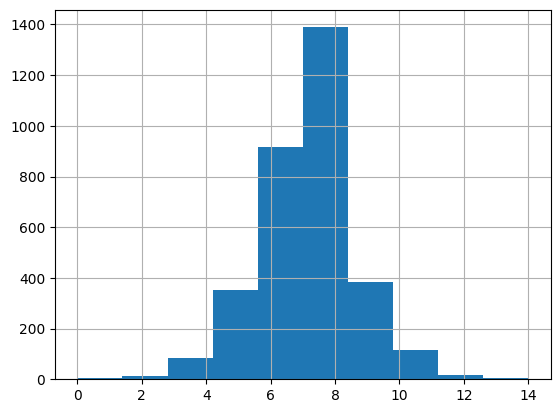

In [46]:
# Check data distribution
df.ph.hist()

<Axes: >

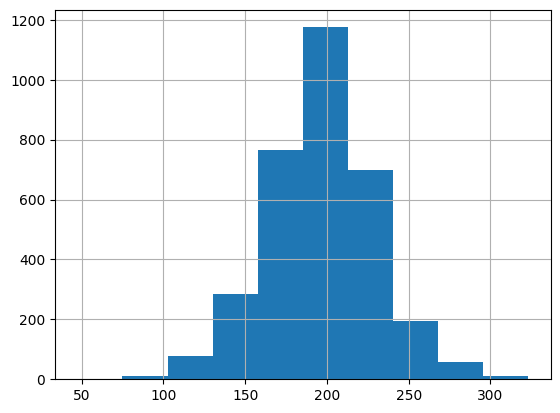

In [47]:
df.hardness.hist()

<Axes: >

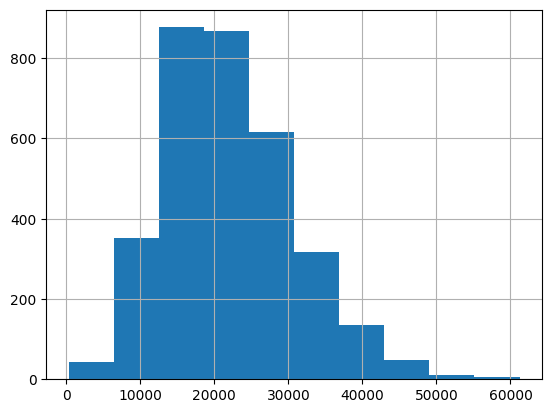

In [48]:
df.solids.hist()

<Axes: >

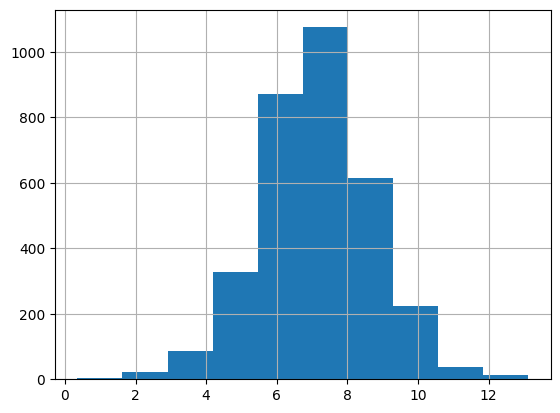

In [49]:
df.chloramines.hist()

<Axes: >

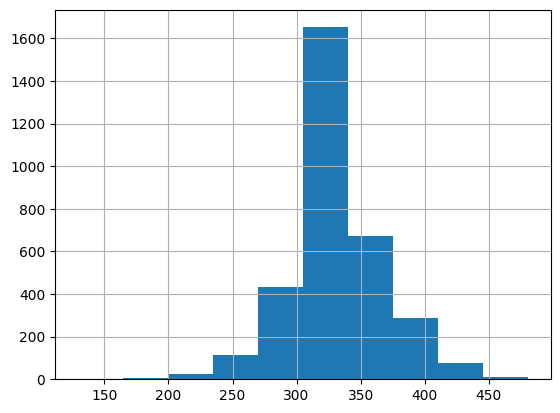

In [50]:
df.sulfate.hist()

<Axes: >

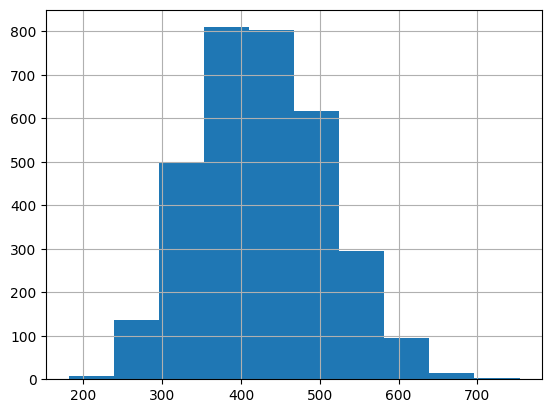

In [51]:
df.conductivity.hist()

<Axes: >

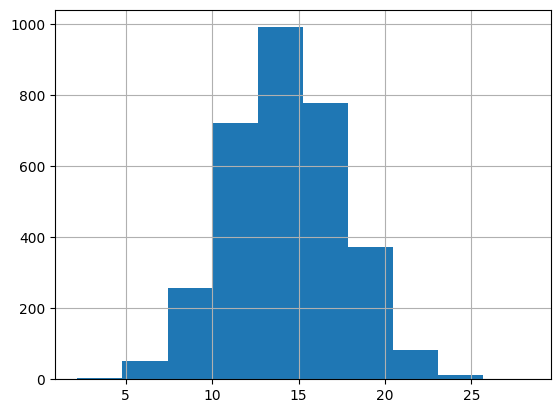

In [52]:
df.organic_carbon.hist()

<Axes: >

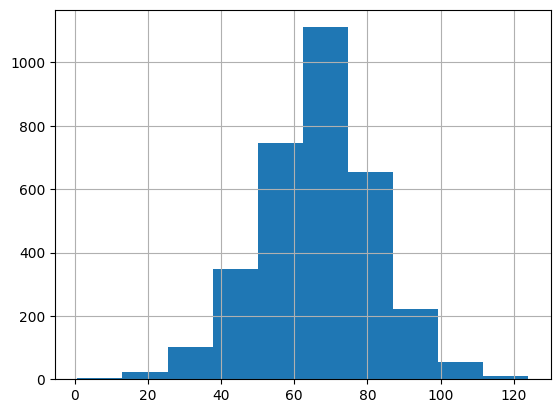

In [53]:
df.trihalomethanes.hist()

<Axes: >

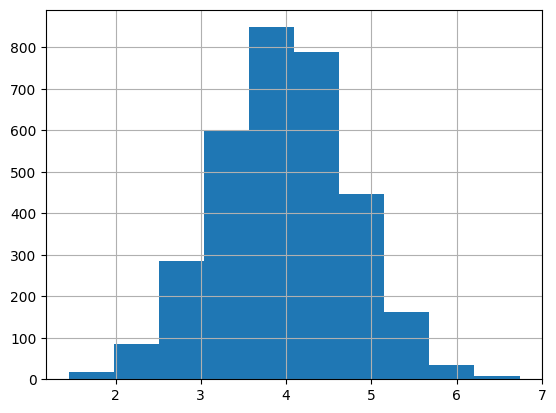

In [54]:
df.turbidity.hist()

In [55]:
# split dataset into test and train

#test data will be 15% of the total
#since data was split by potability before, it need to be suffled
# stratify parameter is used to keep proporcion of potability into datasets

df_train, df_test = train_test_split(df,test_size=0.15, shuffle=True, random_state=7, stratify=df.potability)

Feature Importance Analysis

In [19]:
x_train = df_train.drop(['potability'], axis = 1)
y_train = df_train.potability

x_test = df_test.drop(['potability'], axis = 1)
y_test = df_test.potability

In [20]:
# Check correlation
x_train.corrwith(y_train)

# no feature is specifically determining of potability

ph                -0.003237
hardness          -0.008622
solids             0.035368
chloramines        0.021102
sulfate           -0.021631
conductivity      -0.010341
organic_carbon    -0.027405
trihalomethanes   -0.010182
turbidity          0.001408
dtype: float64

In [21]:
# check correlation between features -> no correlation
for col in x_train.columns:
  print(col)
  print('')
  print(x_train.corrwith(x_train[col]))
  print('')

ph

ph                 1.000000
hardness           0.076744
solids            -0.085212
chloramines       -0.035678
sulfate            0.022458
conductivity       0.026754
organic_carbon     0.047678
trihalomethanes    0.003328
turbidity         -0.023062
dtype: float64

hardness

ph                 0.076744
hardness           1.000000
solids            -0.031213
chloramines       -0.033432
sulfate           -0.096646
conductivity      -0.026177
organic_carbon     0.014615
trihalomethanes   -0.000902
turbidity         -0.010810
dtype: float64

solids

ph                -0.085212
hardness          -0.031213
solids             1.000000
chloramines       -0.054436
sulfate           -0.146611
conductivity       0.019751
organic_carbon     0.005497
trihalomethanes   -0.004385
turbidity          0.030454
dtype: float64

chloramines

ph                -0.035678
hardness          -0.033432
solids            -0.054436
chloramines        1.000000
sulfate            0.024950
conductivity      -0.

Model selection

---
We will use 4 different models for this classification problem:


*   Logistic Regression
*   RandomForestClassifier
*   XGBoost
*    MLPClassifier








In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [30]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
Cs = np.linspace(0.1,1,11)
iters = [50, 70, 100, 200]

best = [0,0,0,0]

for solv in solvers:
  for C in Cs:
    for iter in iters:
      model = LogisticRegression(solver=solv, C=C, max_iter=iter, random_state=7)
      model.fit(x_train, y_train)
      y_pred = model.predict_proba(x_test)[:, 1]

      auc = roc_auc_score(y_test, y_pred)
      print(f'solver = {solv} C = {C} iterations = {iter} auc = {auc}')

      if auc > best[3]:
        best = [solv, C, iter, auc]

print('Best model is: ', best)

solver = lbfgs C = 0.1 iterations = 50 auc = 0.4903819444444445
solver = lbfgs C = 0.1 iterations = 70 auc = 0.4903819444444445
solver = lbfgs C = 0.1 iterations = 100 auc = 0.4903819444444445
solver = lbfgs C = 0.1 iterations = 200 auc = 0.4903819444444445
solver = lbfgs C = 0.19 iterations = 50 auc = 0.4903819444444445
solver = lbfgs C = 0.19 iterations = 70 auc = 0.4903819444444445
solver = lbfgs C = 0.19 iterations = 100 auc = 0.4903819444444445
solver = lbfgs C = 0.19 iterations = 200 auc = 0.4903819444444445
solver = lbfgs C = 0.28 iterations = 50 auc = 0.4903819444444445
solver = lbfgs C = 0.28 iterations = 70 auc = 0.4903819444444445
solver = lbfgs C = 0.28 iterations = 100 auc = 0.4903819444444445
solver = lbfgs C = 0.28 iterations = 200 auc = 0.4903819444444445
solver = lbfgs C = 0.37 iterations = 50 auc = 0.4903819444444445
solver = lbfgs C = 0.37 iterations = 70 auc = 0.4903819444444445
solver = lbfgs C = 0.37 iterations = 100 auc = 0.4903819444444445
solver = lbfgs C = 0.3

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.1 iterations = 50 auc = 0.5158159722222222
solver = newton-cg C = 0.1 iterations = 70 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.1 iterations = 100 auc = 0.5158159722222222
solver = newton-cg C = 0.1 iterations = 200 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.19 iterations = 50 auc = 0.5159548611111111
solver = newton-cg C = 0.19 iterations = 70 auc = 0.5159548611111111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.19 iterations = 100 auc = 0.5159548611111111
solver = newton-cg C = 0.19 iterations = 200 auc = 0.5159548611111111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.28 iterations = 50 auc = 0.5158506944444444
solver = newton-cg C = 0.28 iterations = 70 auc = 0.5158506944444444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.28 iterations = 100 auc = 0.5158506944444444
solver = newton-cg C = 0.28 iterations = 200 auc = 0.5158506944444444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.37 iterations = 50 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.37 iterations = 70 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.37 iterations = 100 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.37 iterations = 200 auc = 0.5158159722222222


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.45999999999999996 iterations = 50 auc = 0.5158680555555555


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.45999999999999996 iterations = 70 auc = 0.5158680555555555


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.45999999999999996 iterations = 100 auc = 0.5158680555555555


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.45999999999999996 iterations = 200 auc = 0.5158680555555555
solver = newton-cg C = 0.5499999999999999 iterations = 50 auc = 0.5159027777777777


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarn

solver = newton-cg C = 0.5499999999999999 iterations = 70 auc = 0.5159027777777777
solver = newton-cg C = 0.5499999999999999 iterations = 100 auc = 0.5159027777777777


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarn

solver = newton-cg C = 0.5499999999999999 iterations = 200 auc = 0.5159027777777777


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


solver = newton-cg C = 0.64 iterations = 50 auc = 0.5158506944444444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.64 iterations = 70 auc = 0.5158506944444444
solver = newton-cg C = 0.64 iterations = 100 auc = 0.5158506944444444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.64 iterations = 200 auc = 0.5158506944444444
solver = newton-cg C = 0.73 iterations = 50 auc = 0.5158333333333334


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


solver = newton-cg C = 0.73 iterations = 70 auc = 0.5158333333333334
solver = newton-cg C = 0.73 iterations = 100 auc = 0.5158333333333334


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, Li

solver = newton-cg C = 0.73 iterations = 200 auc = 0.5158333333333334
solver = newton-cg C = 0.82 iterations = 50 auc = 0.5159027777777777


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.82 iterations = 70 auc = 0.5159027777777777
solver = newton-cg C = 0.82 iterations = 100 auc = 0.5159027777777777


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.82 iterations = 200 auc = 0.5159027777777777
solver = newton-cg C = 0.9099999999999999 iterations = 50 auc = 0.51625


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.9099999999999999 iterations = 70 auc = 0.51625
solver = newton-cg C = 0.9099999999999999 iterations = 100 auc = 0.51625


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 0.9099999999999999 iterations = 200 auc = 0.51625
solver = newton-cg C = 1.0 iterations = 50 auc = 0.5161458333333333


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optim

solver = newton-cg C = 1.0 iterations = 70 auc = 0.5161458333333333
solver = newton-cg C = 1.0 iterations = 100 auc = 0.5161458333333333
solver = newton-cg C = 1.0 iterations = 200 auc = 0.5161458333333333
solver = newton-cholesky C = 0.1 iterations = 50 auc = 0.5158159722222222
solver = newton-cholesky C = 0.1 iterations = 70 auc = 0.5158159722222222
solver = newton-cholesky C = 0.1 iterations = 100 auc = 0.5158159722222222
solver = newton-cholesky C = 0.1 iterations = 200 auc = 0.5158159722222222
solver = newton-cholesky C = 0.19 iterations = 50 auc = 0.5157986111111111
solver = newton-cholesky C = 0.19 iterations = 70 auc = 0.5157986111111111
solver = newton-cholesky C = 0.19 iterations = 100 auc = 0.5157986111111111
solver = newton-cholesky C = 0.19 iterations = 200 auc = 0.5157986111111111
solver = newton-cholesky C = 0.28 iterations = 50 auc = 0.5158333333333333
solver = newton-cholesky C = 0.28 iterations = 70 auc = 0.5158333333333333
solver = newton-cholesky C = 0.28 iterations

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.1 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.1 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.19 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.19 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.19 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.19 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.28 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.28 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.28 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.28 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.37 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.37 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.37 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.37 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.45999999999999996 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.45999999999999996 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.45999999999999996 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.45999999999999996 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.5499999999999999 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.5499999999999999 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.5499999999999999 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.5499999999999999 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.64 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.64 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.64 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.64 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.73 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.73 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.73 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.73 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.82 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.82 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.82 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.82 iterations = 200 auc = 0.5045138888888889
solver = sag C = 0.9099999999999999 iterations = 50 auc = 0.5077951388888889
solver = sag C = 0.9099999999999999 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.9099999999999999 iterations = 100 auc = 0.5044097222222221
solver = sag C = 0.9099999999999999 iterations = 200 auc = 0.5045138888888889
solver = sag C = 1.0 iterations = 50 auc = 0.5077951388888889
solver = sag C = 1.0 iterations = 70 auc = 0.5052430555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 1.0 iterations = 100 auc = 0.5044097222222221
solver = sag C = 1.0 iterations = 200 auc = 0.5045138888888889
solver = saga C = 0.1 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.1 iterations = 70 auc = 0.5125173611111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.1 iterations = 100 auc = 0.5076562499999999
solver = saga C = 0.1 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.19 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.19 iterations = 70 auc = 0.5125173611111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.19 iterations = 100 auc = 0.5076562499999999
solver = saga C = 0.19 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.28 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.28 iterations = 70 auc = 0.5125173611111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.28 iterations = 100 auc = 0.5076562499999999
solver = saga C = 0.28 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.37 iterations = 50 auc = 0.5125347222222222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.37 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.37 iterations = 100 auc = 0.5076562499999999
solver = saga C = 0.37 iterations = 200 auc = 0.5043229166666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.45999999999999996 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.45999999999999996 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.45999999999999996 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.45999999999999996 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.5499999999999999 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.5499999999999999 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.5499999999999999 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.5499999999999999 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.64 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.64 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.64 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.64 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.73 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.73 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.73 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.73 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.82 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.82 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.82 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.82 iterations = 200 auc = 0.5043229166666667
solver = saga C = 0.9099999999999999 iterations = 50 auc = 0.5125347222222222
solver = saga C = 0.9099999999999999 iterations = 70 auc = 0.5125173611111111
solver = saga C = 0.9099999999999999 iterations = 100 auc = 0.5076562499999999


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.9099999999999999 iterations = 200 auc = 0.5043229166666667
solver = saga C = 1.0 iterations = 50 auc = 0.5125347222222222
solver = saga C = 1.0 iterations = 70 auc = 0.5125173611111111
solver = saga C = 1.0 iterations = 100 auc = 0.5076562499999999
solver = saga C = 1.0 iterations = 200 auc = 0.5043229166666667
Best model is:  ['newton-cg', 0.9099999999999999, 50, 0.51625]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
criterias = ['gini', 'entropy', 'log_loss']
estimators = [10, 50, 100, 200, 500]
depths = range(1, len(x_train.columns) + 1)

best = [0,0,0,0]

for criteria in criterias:
  for estimator in estimators:
    for depth in depths:
      dt = RandomForestClassifier(criterion=criteria, n_estimators= estimator, max_depth= depth, random_state = 7)
      dt.fit(x_train, y_train)
      y_pred = dt.predict_proba(x_test)[:,1]
      auc = roc_auc_score(y_test, y_pred)

      print(f'Criterion = {criteria} n_estimators = {estimator} max_depth = {depth} auc = {auc}')

      if auc > best[3]:
        best = [criteria, estimator, depth, auc]

print('Best model is: ', best)

Criterion = gini n_estimators = 10 max_depth = 1 auc = 0.63765625
Criterion = gini n_estimators = 10 max_depth = 2 auc = 0.74703125
Criterion = gini n_estimators = 10 max_depth = 3 auc = 0.8107812500000001
Criterion = gini n_estimators = 10 max_depth = 4 auc = 0.8325086805555555
Criterion = gini n_estimators = 10 max_depth = 5 auc = 0.8501736111111111
Criterion = gini n_estimators = 10 max_depth = 6 auc = 0.8614062499999999
Criterion = gini n_estimators = 10 max_depth = 7 auc = 0.8720659722222223
Criterion = gini n_estimators = 10 max_depth = 8 auc = 0.8564756944444444
Criterion = gini n_estimators = 10 max_depth = 9 auc = 0.8592534722222223
Criterion = gini n_estimators = 50 max_depth = 1 auc = 0.6553559027777777
Criterion = gini n_estimators = 50 max_depth = 2 auc = 0.7708506944444444
Criterion = gini n_estimators = 50 max_depth = 3 auc = 0.8425607638888889
Criterion = gini n_estimators = 50 max_depth = 4 auc = 0.84671875
Criterion = gini n_estimators = 50 max_depth = 5 auc = 0.85840

In [33]:
import xgboost as xgb

In [34]:
features = list(x_train.columns)
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(x_test, label=y_test, feature_names=features)

In [36]:
etas = np.linspace(0,1,11)
estimators = [10, 50, 100, 200, 500]
depths = range(1, len(x_train.columns) + 1)
best = [0,0,0,0]

for eta in etas:
  for estimator in estimators:
    for depth in depths:
      model = xgb.XGBClassifier(n_estimators = estimator, max_depth = depth, learning_rate = eta, random_state = 7)
      model.fit(x_train, y_train)
      y_pred = model.predict_proba(x_test)[:,1]
      auc = roc_auc_score(y_test, y_pred)

      print(f'ETA = {eta} n_estimators = {estimator} max_depth = {depth} auc = {auc}')

      if auc > best[3]:
        best = [eta, estimator, depth, auc]

print('Best model is: ', best)

ETA = 0.0 n_estimators = 10 max_depth = 1 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 2 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 3 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 4 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 5 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 6 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 7 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 8 auc = 0.5
ETA = 0.0 n_estimators = 10 max_depth = 9 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 1 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 2 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 3 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 4 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 5 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 6 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 7 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 8 auc = 0.5
ETA = 0.0 n_estimators = 50 max_depth = 9 auc = 0.5
ETA = 0.0 n_estimators = 100 max_depth = 1 auc = 0.5
ETA = 0.0 n

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
hidden_layers = [50, 100, 200, 500]
solvers = ['lbfgs', 'sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1, 10, 100]
best = [0,0,0,0]

for solver in solvers:
  for hidden_layer in hidden_layers:
    for alpha in alphas:
      model = MLPClassifier(hidden_layer_sizes=(hidden_layer,), solver=solver, alpha = alpha, random_state=7)
      model.fit(x_train, y_train)
      y_pred = model.predict_proba(x_test)[:,1]
      auc = roc_auc_score(y_test, y_pred)

      print(f'Solver = {solver} hidden_layer_size = {hidden_layer} alpha = {alpha} auc = {auc}')

      if auc > best[3]:
        best = [solver, hidden_layer, alpha, auc]

print('Best is: ', best)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 50 alpha = 0.0001 auc = 0.5
Solver = lbfgs hidden_layer_size = 50 alpha = 0.001 auc = 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 50 alpha = 0.01 auc = 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 50 alpha = 0.1 auc = 0.5
Solver = lbfgs hidden_layer_size = 50 alpha = 10 auc = 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 50 alpha = 100 auc = 0.5
Solver = lbfgs hidden_layer_size = 100 alpha = 0.0001 auc = 0.49991319444444443


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 100 alpha = 0.001 auc = 0.49991319444444443
Solver = lbfgs hidden_layer_size = 100 alpha = 0.01 auc = 0.49991319444444443


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 100 alpha = 0.1 auc = 0.49991319444444443
Solver = lbfgs hidden_layer_size = 100 alpha = 10 auc = 0.49991319444444443


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 100 alpha = 100 auc = 0.49991319444444443


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 0.0001 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 0.001 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 0.01 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 0.1 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 10 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 200 alpha = 100 auc = 0.5055034722222221


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 0.0001 auc = 0.4994270833333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 0.001 auc = 0.4994270833333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 0.01 auc = 0.4994270833333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 0.1 auc = 0.4994270833333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 10 auc = 0.4994270833333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver = lbfgs hidden_layer_size = 500 alpha = 100 auc = 0.4994270833333333
Solver = sgd hidden_layer_size = 50 alpha = 0.0001 auc = 0.4973958333333333
Solver = sgd hidden_layer_size = 50 alpha = 0.001 auc = 0.4973958333333333
Solver = sgd hidden_layer_size = 50 alpha = 0.01 auc = 0.4973958333333333
Solver = sgd hidden_layer_size = 50 alpha = 0.1 auc = 0.4973958333333333
Solver = sgd hidden_layer_size = 50 alpha = 10 auc = 0.4973958333333333
Solver = sgd hidden_layer_size = 50 alpha = 100 auc = 0.5087673611111111
Solver = sgd hidden_layer_size = 100 alpha = 0.0001 auc = 0.4942708333333333
Solver = sgd hidden_layer_size = 100 alpha = 0.001 auc = 0.49293402777777784
Solver = sgd hidden_layer_size = 100 alpha = 0.01 auc = 0.49293402777777784
Solver = sgd hidden_layer_size = 100 alpha = 0.1 auc = 0.49293402777777784
Solver = sgd hidden_layer_size = 100 alpha = 10 auc = 0.49454861111111115
Solver = sgd hidden_layer_size = 100 alpha = 100 auc = 0.5087673611111111
Solver = sgd hidden_layer_si